In [1]:
from goatools import obo_parser
from scipy.spatial.distance import squareform
from statsmodels.distributions.empirical_distribution import ECDF

import graco
import random
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_DIRECTORY = "/media/clusterduck123/joe/data"
RAW_DATA_DIRECTORY = f"{DATA_DIRECTORY}/raw-data"
YEAST_DIRECTORY = f"{DATA_DIRECTORY}/processed-data/yeast"
NETWORK_DIRECTORY = f"{YEAST_DIRECTORY}/networks"
ANNOTATION_DIRECTORY = f"{YEAST_DIRECTORY}/annotations"

# Load data

## PPI

In [3]:
PPI_nx = nx.read_edgelist(f"{NETWORK_DIRECTORY}/PPI_BioGRID.txt")
GDV = graco.orbits(PPI_nx)
GCV = graco.coefficients(GDV)

## Annotations

In [4]:
aspect = 'BP'
PPI = nx.read_edgelist(f"{NETWORK_DIRECTORY}/PPI_BioGRID.txt")
annotation_df = pd.read_csv(f"{ANNOTATION_DIRECTORY}/GO_{aspect}_BioGRID-SGD.csv")
go_dag = obo_parser.GODag(f"{RAW_DATA_DIRECTORY}/go-basic.obo")

gene_population = set(PPI.nodes())
GO_population = set(annotation_df.GO_ID)

/media/clusterduck123/joe/data/raw-data/go-basic.obo: fmt(1.2) rel(2019-10-07) 47,285 GO Terms


In [5]:
# Conversion dictionaries
GO2genes = pd.Series({go_id: set(genes.Systematic_ID) for go_id, genes in annotation_df.groupby('GO_ID')}, 
                     name='nb_genes')

gene2GO  = {gene : set(go_ids.GO_ID) for gene, go_ids in annotation_df.groupby('Systematic_ID')}
global_GO_counter = GO2genes.apply(len)

# Action

In [6]:
abundand_GO = [go_id for go_id,gene_list in GO2genes.items() if len(gene_list) > 99]
print(len(abundand_GO))

293


In [43]:
Eq = ['D','A']
distance = 'cityblock'

D = graco.GCV_distance(GCV[Eq], distance)
all_genes = set(GCV[Eq].dropna().index)

In [47]:
len(all_genes), len(GCV)

(5184, 5726)

In [50]:
GCV[Eq]

Group             D                                                    \
Equation          0                   1                                 
Orbit             2         3        10        12         5         8   
YLR418C    0.716298  0.283702  0.448191  0.051512  0.465943  0.034354   
YOL145C    0.712994  0.287006  0.424165  0.061155  0.477013  0.037667   
YOR123C    0.527738  0.472262  0.486947  0.094954  0.373118  0.044981   
YBR279W    0.699565  0.300435  0.439870  0.059224  0.462896  0.038010   
YML069W    0.708524  0.291476  0.491373  0.052778  0.427800  0.028050   
...             ...       ...       ...       ...       ...       ...   
YFR018C         NaN       NaN       NaN       NaN       NaN       NaN   
YBR056W-A       NaN       NaN       NaN       NaN       NaN       NaN   
YOR278W         NaN       NaN       NaN       NaN       NaN       NaN   
YCR010C         NaN       NaN       NaN       NaN       NaN       NaN   
YBL029C-A       NaN       NaN       NaN       NaN       NaN       NaN   

Group                                              ...         A            \
Equation          2                             3  ...         1             
Orbit            11        13         7        11  ...        10        13   
YLR418C    0.350676  0.074459  0.574866  0.442697  ...  0.399458  0.005437   
YOL145C    0.339691  0.083229  0.577081  0.421939  ...  0.417895  0.004241   
YOR123C    0.478586  0.201108  0.320305  0.267403  ...  0.329827  0.002537   
YBR279W    0.348832  0.089842  0.561325  0.406129  ...  0.369829  0.003552   
YML069W    0.317771  0.084666  0.597563  0.386221  ...  0.440705  0.006513   
...             ...       ...       ...       ...  ...       ...       ...   
YFR018C         NaN       NaN       NaN       NaN  ...  0.000000  0.000000   
YBR056W-A       NaN       NaN       NaN       NaN  ...  0.000000  0.000000   
YOR278W         NaN       NaN       NaN       NaN  ...  0.000000  0.000000   
YCR010C         NaN       NaN       NaN       NaN  ...  0.000000  0.000000   
YBL029C-A       NaN       NaN       NaN       NaN  ...  0.000000  0.000000   

Group                                                                  \
Equation                              2                             3   
Orbit             4         8        10        13         6        12   
YLR418C    0.559049  0.015309  0.037223  0.000507  0.962271  0.136243   
YOL145C    0.536513  0.018555  0.028322  0.000287  0.971390  0.142626   
YOR123C    0.634632  0.015234  0.020687  0.000159  0.979154  0.129152   
YBR279W    0.591109  0.015979  0.025211  0.000242  0.974547  0.120099   
YML069W    0.521112  0.012579  0.040442  0.000598  0.958960  0.145781   
...             ...       ...       ...       ...       ...       ...   
YFR018C    1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
YBR056W-A  1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
YOR278W    1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
YCR010C    1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
YBL029C-A  1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   

Group                          
Equation                       
Orbit            14         9  
YLR418C    0.010375  0.696388  
YOL145C    0.005326  0.698770  
YOR123C    0.004279  0.728858  
YBR279W    0.004791  0.745428  
YML069W    0.013135  0.669032  
...             ...       ...  
YFR018C    0.000000  1.000000  
YBR056W-A  0.000000  1.000000  
YOR278W    0.000000  1.000000  
YCR010C    0.000000  1.000000  
YBL029C-A  0.000000  1.000000  

[5726 rows x 24 columns]

In [46]:
D.isna().any().any()

False

In [12]:
GO_id = abundand_GO[0]
GO_genes  = GO2genes[GO_id]              & set(GCV[Eq].dropna().index)
nGO_genes = (gene_population - GO_genes) & set(GCV[Eq].dropna().index)

assert len(all_genes) == len(GO_genes) + len(nGO_genes)
k = len(GO_genes)

In [13]:
mu_list  = []
var_list = []

for i in range(1000):
    sample_genes = random.sample(all_genes,k)
    sample_dists = squareform(D.loc[sample_genes,sample_genes])
    
    mu_list.append( np.mean(sample_dists))
    var_list.append(np.var( sample_dists))

(0, 1)

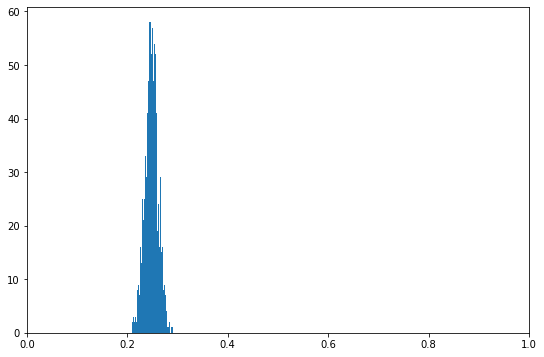

In [14]:
fig, ax = plt.subplots(figsize=(9,6))
ax.hist(mu_list, bins=50);
ax.set_xlim(0,1)

In [15]:
GO_dists = squareform(D.loc[GO_genes,GO_genes])
GO_mu  = np.mean(GO_dists)
GO_var = np.var( GO_dists)

In [16]:
ecdf_mu  = ECDF(mu_list )
ecdf_var = ECDF(var_list)

In [17]:
ecdf_mu( GO_mu ), ecdf_var(GO_var)

(0.006, 0.001)

In [29]:
sample_genes = random.sample(all_genes,k)
sample_dists = squareform(D.loc[sample_genes,sample_genes])

In [34]:
prototype = GCV.loc[all_genes, Eq].mean()

In [35]:
for gene in all_genes:
    break

In [39]:
graco.distance(GCV.loc[gene,Eq], prototype, distance)

1.0794814630489125

In [ ]:
def get_mu_and_var_dist(k, all_genes, D, sample_size=100):
    mu_list  = []
    var_list = []

    for _ in range(sample_size):
        sample_genes = random.sample(all_genes,k)
        sample_dists = squareform(D.loc[sample_genes,sample_genes])

        mu_list.append( np.mean(sample_dists))
        #var_list.append(np.var( sample_dists))

In [19]:
sample_size = 100
significant_GO_list = []

for GO_id in abundand_GO:
    
    GO_genes  = GO2genes[GO_id]              & set(GCV[Eq].dropna().index)
    nGO_genes = (gene_population - GO_genes) & set(GCV[Eq].dropna().index)
    
    k = len(GO_genes)

    assert len(all_genes) == len(GO_genes) + len(nGO_genes)
    
    mu_list  = []
    #var_list = []

    for _ in range(sample_size):
        sample_genes = random.sample(all_genes,k)
        sample_dists = squareform(D.loc[sample_genes,sample_genes])

        mu_list.append( np.mean(sample_dists))
        #var_list.append(np.var( sample_dists))
        
    GO_dists = squareform(D.loc[GO_genes,GO_genes])
    GO_mu  = np.mean(GO_dists)
    #GO_var = np.var( GO_dists)
    
    #ecdf_mu  = ECDF(mu_list )
    #ecdf_var = ECDF(var_list)
    
    #p_mu  = ecdf_mu( GO_mu )
    #p_var = ecdf_var(GO_var)
    
    if GO_mu < sorted(mu_list)[1]:
        print(k, go_dag[GO_id].name)
        significant_GO_list.append(GO_id)
        #print(f"p-value mu : {p_mu :.9f}")
        #print(f"p-value var: {p_var:.9f}")

141 negative regulation of transcription by RNA polymerase II
105 generation of precursor metabolites and energy
1145 nucleobase-containing compound metabolic process
359 DNA metabolic process
220 DNA repair
147 DNA recombination
280 chromatin organization
112 chromatin silencing
102 transcription, DNA-templated
531 regulation of transcription, DNA-templated
384 regulation of transcription by RNA polymerase II
223 rRNA processing
431 RNA processing
120 mRNA processing
117 RNA export from nucleus
522 cellular protein modification process
123 protein phosphorylation
239 proteolysis
156 ubiquitin-dependent protein catabolic process
104 peptide metabolic process
1208 cellular aromatic compound metabolic process
2059 nitrogen compound metabolic process
917 transport
336 intracellular protein transport
154 nucleocytoplasmic transport
129 autophagy
585 response to stress
261 cellular response to DNA damage stimulus
716 organelle organization
133 cytoskeleton organization
149 vacuolar transpor

254 mitotic cell cycle process
531 regulation of nucleic acid-templated transcription
245 negative regulation of nucleic acid-templated transcription
297 positive regulation of nucleic acid-templated transcription
677 regulation of cellular macromolecule biosynthetic process
293 negative regulation of cellular macromolecule biosynthetic process
531 regulation of RNA biosynthetic process


In [20]:
len(significant_GO_list), len(abundand_GO)

(213, 293)

In [21]:
GO_id = significant_GO_list[0]

In [23]:
GO_genes  = GO2genes[GO_id]              & set(GCV[Eq].dropna().index)
nGO_genes = (gene_population - GO_genes) & set(GCV[Eq].dropna().index)

k = len(GO_genes)

assert len(all_genes) == len(GO_genes) + len(nGO_genes)

mu_list  = []
#var_list = []

for _ in range(2**10):
    sample_genes = random.sample(all_genes,k)
    sample_dists = squareform(D.loc[sample_genes,sample_genes])

    mu_list.append( np.mean(sample_dists))
    #var_list.append(np.var( sample_dists))

GO_dists = squareform(D.loc[GO_genes,GO_genes])
GO_mu  = np.mean(GO_dists)

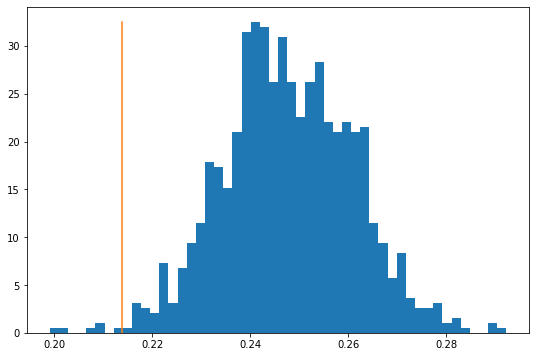

In [24]:
fig, ax = plt.subplots(figsize=(9,6))
bars, pos, sth = ax.hist(mu_list, bins=50, density=True)
ax.plot([GO_mu,GO_mu], [0,max(bars)]);

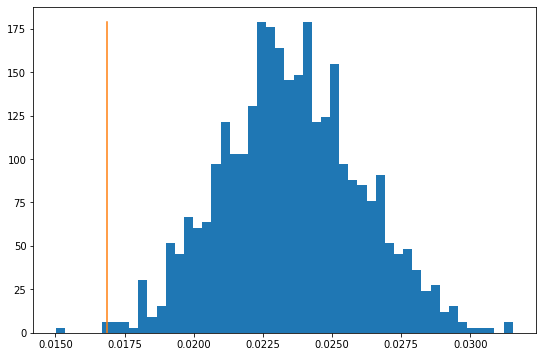

In [25]:
fig, ax = plt.subplots(figsize=(9,6))
bars, pos, sth = ax.hist(var_list, bins=50, density=True)
ax.plot([GO_var,GO_var], [0,max(bars)]);

In [26]:
data = GCV[Eq].dropna()
data['hue'] = 0

GO_data = data.loc[GO_genes]
GO_data['hue'] = 1

sample_data = data.loc[sample_genes]
sample_data['hue'] = 2

data = data.append([GO_data,sample_data])

In [28]:
data

Equation          0                   1                                \
Orbit             2         3        10        12         5         8   
YLR418C    0.716298  0.283702  0.448191  0.051512  0.465943  0.034354   
YOL145C    0.712994  0.287006  0.424165  0.061155  0.477013  0.037667   
YOR123C    0.527738  0.472262  0.486947  0.094954  0.373118  0.044981   
YBR279W    0.699565  0.300435  0.439870  0.059224  0.462896  0.038010   
YML069W    0.708524  0.291476  0.491373  0.052778  0.427800  0.028050   
...             ...       ...       ...       ...       ...       ...   
YAR033W    0.694444  0.305556  0.383953  0.049577  0.465170  0.101300   
YLR367W    0.639223  0.360777  0.425241  0.095877  0.405412  0.073470   
YGR136W    0.826840  0.173160  0.222990  0.041528  0.700332  0.035151   
YFR032C-A  0.588235  0.411765  0.422214  0.115335  0.367809  0.094642   
YLR447C    0.792308  0.207692  0.298731  0.059695  0.588556  0.053018   

Equation          2                             3                     hue  
Orbit            11        13         7        11        13        14      
YLR418C    0.350676  0.074459  0.574866  0.442697  0.375989  0.181314   0  
YOL145C    0.339691  0.083229  0.577081  0.421939  0.413522  0.164540   0  
YOR123C    0.478586  0.201108  0.320305  0.267403  0.449465  0.283133   0  
YBR279W    0.348832  0.089842  0.561325  0.406129  0.418395  0.175476   0  
YML069W    0.317771  0.084666  0.597563  0.386221  0.411613  0.202166   0  
...             ...       ...       ...       ...       ...       ...  ..  
YAR033W    0.434286  0.102857  0.462857  0.493506  0.467532  0.038961   2  
YLR367W    0.387844  0.121466  0.490690  0.343590  0.430427  0.225983   2  
YGR136W    0.253403  0.033508  0.713089  0.605000  0.320000  0.075000   2  
YFR032C-A  0.423333  0.169167  0.407500  0.302381  0.483333  0.214286   2  
YLR447C    0.283768  0.042369  0.673863  0.541261  0.323262  0.135478   2  

[5466 rows x 13 columns]

ValueError: Wrong number of items passed 3, placement implies 5466

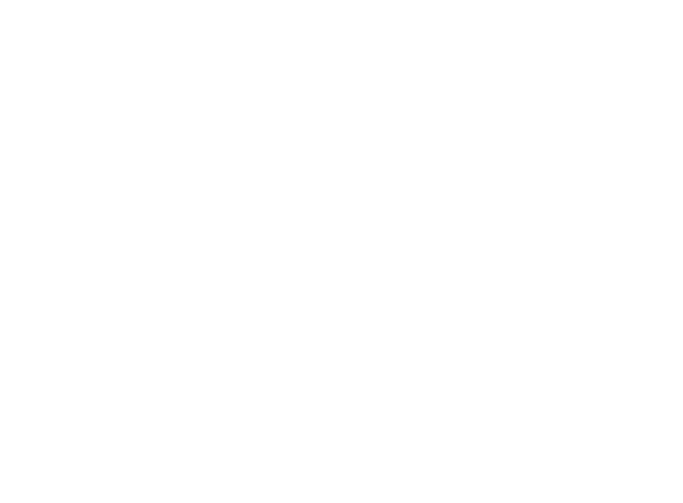

In [27]:
fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

ax.axis('off')

sns.stripplot(x='hue', y='2',data=data, ax=ax);

In [40]:
GO_genes = GO2genes['GO:0006281']

In [42]:
GCV[Eq].loc[GO_genes]

Orbit,2,3
YDL084W,0.707345,0.292655
YMR039C,0.747036,0.252964
YBR098W,0.801471,0.198529
YOL090W,0.824390,0.175610
YBR278W,0.633987,0.366013
...,...,...
YDR013W,0.532468,0.467532
YGL126W,0.733333,0.266667
YDR439W,0.889617,0.110383
YCL061C,0.689218,0.310782


In [45]:
len(set(GCV.columns.droplevel([depth-1])))

23

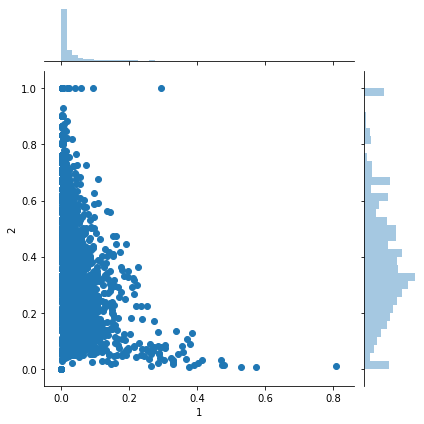

In [8]:
ax = sns.jointplot(data=data, x='1', y='2')

In [9]:
genes = data[data['1']>0.5]
genes

Orbit,2,3,1,3
YAL021C,0.006051,0.993949,0.571985,0.428015
YGL122C,0.007651,0.992349,0.529801,0.470199
YDL160C,0.008952,0.991048,0.809326,0.190674


In [11]:
annotation_df[(annotation_df.Systematic_ID.isin(genes.index)) & (annotation_df.Level == 1)].GO_ID.unique()

array(['GO:0009987', 'GO:0065007', 'GO:0008152', 'GO:0051179',
       'GO:0071840'], dtype=object)

In [12]:
len(annotation_df[annotation_df.Level == 1].GO_ID.unique())

18

In [22]:
for go_id in annotation_df[annotation_df.Level == 1].GO_ID.unique():
    print(go_dag[go_id].name)

biological regulation
cellular process
metabolic process
reproductive process
cellular component organization or biogenesis
localization
developmental process
growth
response to stimulus
reproduction
biological adhesion
multi-organism process
nitrogen utilization
cell aggregation
detoxification
carbon utilization
rhythmic process
immune system process


In [116]:
n = 123
m = 45

nx.barabasi_albert_graph(n,m).number_of_edges()

3510

In [117]:
m*(n-m)

3510

In [124]:
n = 5000
rho = 0.005

In [135]:
n/2 - np.sqrt(n**2/4 - n*(n-1)*rho/2)

25.121215089514862

In [136]:
nx.density(nx.barabasi_albert_graph(n,25))

0.009951990398079615